# Exploratory Data Analysis to help plan Clinical Trials
[Data Source​ Website](https://data.cms.gov/provider-data/dataset/mj5m-pzi6)

Data Dictionary: https://data.cms.gov/provider-data/sites/default/files/data_dictionaries/physician/DOC_Data_Dictionary.pdf

[Exploratory Data Analysis Tutorials](https://www.analyticsvidhya.com/blog/2021/02/introduction-to-exploratory-data-analysis-eda/)



# Summary
The goal of this project was to help people plan clinical trails by creating a dataset of doctors including their location, their speciality, and whether they had clinical trial experience.  To create this dataset, I used data about doctors from [cms.gov](https://data.cms.gov/provider-data/dataset/mj5m-pzi6) and clinicaltrials.gov.  I used pandas to clean and merge the datasets together. After successfully merging the data, I wrote functions to help people query the data and also created visualizations of the data to help people understand what the dataset I created contained. 


---



---



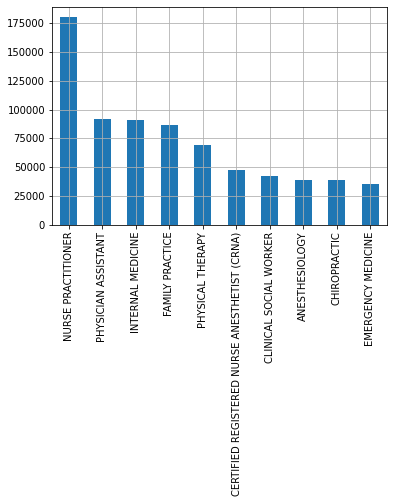

Above I have pulled a count of the top 10 primary specialties found in the created dataset.

#### Some insights before cleaning dataset
* Many NPI values are repeating due to doctors and clinicians working at multiple locations.
* Certain organizatons have the same name, but have different addresses, might have to be wary while cleaning.
* Phone number column is in float data type, many of them are decimals to a power of 10

#### Created bulleted list to note down observations made while looking at dataset
* There is quite a significant amount of null cells in this dataset.
* NPI contains no nulls, through here we can identify how many doctors are represented.
* NPI however does include many duplicates, this is due to doctors and clinicians having multiple entries in the dataset
* There are 1674853 duplicated NPI entries, when removed it contained 1212388 entries.
* For the middle name column there is a mix of nulls, full middle names, and initals.

#### Questions about dataset
* Is there any other way to get accurate phone numbers, changing the data type will round the number to nearest integer.
* Will removing depeating NPI's affect the information I can retrieve from this dataset?
* Are we specifically focusing on the US?



# 1. Importing packages
These packages will help me manipulate and clean the data more efficiently 

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This cell downloads the data from the cms website
! wget https://data.cms.gov/provider-data/sites/default/files/resources/69a75aa9d3dc1aed6b881725cf0ddc12_1657545617/DAC_NationalDownloadableFile.csv 

--2022-08-02 14:55:15--  https://data.cms.gov/provider-data/sites/default/files/resources/69a75aa9d3dc1aed6b881725cf0ddc12_1657545617/DAC_NationalDownloadableFile.csv
Resolving data.cms.gov (data.cms.gov)... 23.216.92.229, 2600:1408:c400:1889::28a, 2600:1408:c400:1882::28a
Connecting to data.cms.gov (data.cms.gov)|23.216.92.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 731536014 (698M) [text/csv]
Saving to: ‘DAC_NationalDownloadableFile.csv’

DAC_NationalDownloa 100%[===================>] 697.65M  93.7MB/s    in 8.9s    

2022-08-02 14:55:24 (78.6 MB/s) - ‘DAC_NationalDownloadableFile.csv’ saved [731536014/731536014]



In [ ]:
# Running ls shows us that the DAC_NationalDownnloadableFile.csv is available in the local filesystem for this notebook
! ls

DAC_NationalDownloadableFile.csv  drive  sample_data


In [ ]:
# This line reads in the file to a pandas dataframe
df = pd.read_csv('DAC_NationalDownloadableFile.csv',encoding_errors='ignore',low_memory=False)

In [ ]:
# Now we view the top of the dataframe
df.head(10)

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
0,1215235031,7113184110,I20120202000430,ALLEN,SUSAN,K,NaN,F,NaN,OTHER,1998.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415 N HIGGINS,SUITE 4,NaN,MISSOULA,MT,598024559,4.063030e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,MT598024559MI415XXHIGG302
1,1215315775,840586251,I20160912001561,HILL,SAMANTHA,NaN,NaN,F,NaN,OTHER,2009.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549 NEW RD,SUITE E,NaN,SOMERS POINT,NJ,082442075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NJ082442075SO549XXRDXX301
2,1215478607,1254603012,I20170815001333,WHITED,STEPHANIE,NaN,NaN,F,NaN,OTHER,2012.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602 RADFORD ST,NaN,NaN,CHRISTIANSBURG,VA,240733303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,VA240733303CH602XXSTXX300
3,1215260161,547672214,I20201222001863,AMBRUS,VICTORIA,NaN,NaN,F,NaN,OTHER,2019.0,CLINICAL PSYCHOLOGIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1811A N US HWY 281,SUITE 8,NaN,MARBLE FALLS,TX,786544313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX786544313MA1811A281X501
4,1215265202,5597952945,I20101210000287,COLON GAVILLAN,ADA,NaN,NaN,F,NaN,OTHER,1982.0,PHYSICAL THERAPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8 SUCALLE FLOR GERENA,NaN,NaN,HUMACAO,PR,007913912,7.878501e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,PR007913912HU8XXXXGERE400
5,1215301833,4183971492,I20180718001089,CARROLL,AMANDA,R,NaN,F,NaN,OTHER,2012.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1515 DOCTORS DR,SUITE 4,NaN,BOSSIER CITY,LA,711113321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,LA711113321BO1515XDRXX301
6,1215498258,6305223181,I20220517001257,PRIDDY,WESLEY,PAUL ROBERTS,NaN,M,NaN,UNIVERSITY OF SOUTH FLORIDA COLLEGE OF MEDICINE,2019.0,EMERGENCY MEDICINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12901 BRUCE B DOWNS BLVD,NaN,NaN,TAMPA,FL,336124742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,FL336124742TA12901BLVD500
7,1215325535,2466764758,I20191204000130,OKONOFUA,MODUPE,M,NaN,F,NaN,OTHER,2018.0,NURSE PRACTITIONER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1322 N ACADEMY BLVD,SUITE 203,NaN,COLORADO SPRINGS,CO,809093320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,CO809093320CO1322XBLVD402
8,1215248158,3375667884,I20100903000587,SCHWARTZ,GEDALIA,N,NaN,M,NaN,STATE UNIVERSITY OF NEW YORK - STATE COLLEGE O...,2010.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3282 WESTERN BRANCH BLVD,NaN,NaN,CHESAPEAKE,VA,233215261,7.574848e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,VA233215261CH3282XBLVD400
9,1215237664,8123267630,I20130613000276,VINCOLA,SONJA,NaN,NaN,F,NaN,OTHER,2004.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 BOXFORD RD,NaN,NaN,ROWLEY,MA,019692419,9.788539e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,MA019692419RO61XXXRDXX300


# 2. Cleaning first dataset
Used fuctions like `.info` and `.shape` to gain insight on data that I would be working with

In [ ]:
# Here we check how big the dataframe is
df.shape

(2371710, 40)

In [ ]:
print(df.columns)
#Certain columns seem to having trailing spaces in their names we should try to remove them

Index(['NPI', ' Ind_PAC_ID', ' Ind_enrl_ID', ' lst_nm', ' frst_nm', ' mid_nm',
       ' suff', ' gndr', ' Cred', ' Med_sch', ' Grd_yr', ' pri_spec',
       ' sec_spec_1', '    sec_spec_2', ' sec_spec_3', ' sec_spec_4',
       ' sec_spec_all', '    org_nm', ' org_pac_id', ' num_org_mem',
       ' adr_ln_1', ' adr_ln_2', ' ln_2_sprs', ' cty', ' st', ' zip',
       ' phn_numbr', '    hosp_afl_1', ' hosp_afl_lbn_1', ' hosp_afl_2',
       ' hosp_afl_lbn_2', ' hosp_afl_3', ' hosp_afl_lbn_3', ' hosp_afl_4',
       ' hosp_afl_lbn_4', ' hosp_afl_5', ' hosp_afl_lbn_5', ' ind_assgn',
       ' grp_assgn', ' adrs_id'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)
#Now the column names have been trimmed and will be easier to work with

Index(['NPI', 'Ind_PAC_ID', 'Ind_enrl_ID', 'lst_nm', 'frst_nm', 'mid_nm',
       'suff', 'gndr', 'Cred', 'Med_sch', 'Grd_yr', 'pri_spec', 'sec_spec_1',
       'sec_spec_2', 'sec_spec_3', 'sec_spec_4', 'sec_spec_all', 'org_nm',
       'org_pac_id', 'num_org_mem', 'adr_ln_1', 'adr_ln_2', 'ln_2_sprs', 'cty',
       'st', 'zip', 'phn_numbr', 'hosp_afl_1', 'hosp_afl_lbn_1', 'hosp_afl_2',
       'hosp_afl_lbn_2', 'hosp_afl_3', 'hosp_afl_lbn_3', 'hosp_afl_4',
       'hosp_afl_lbn_4', 'hosp_afl_5', 'hosp_afl_lbn_5', 'ind_assgn',
       'grp_assgn', 'adrs_id'],
      dtype='object')


In [ ]:
df.info()
#using info to check on basic info about dataset such as column name and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371710 entries, 0 to 2371709
Data columns (total 40 columns):
 #   Column          Dtype  
---  ------          -----  
 0   NPI             int64  
 1   Ind_PAC_ID      int64  
 2   Ind_enrl_ID     object 
 3   lst_nm          object 
 4   frst_nm         object 
 5   mid_nm          object 
 6   suff            object 
 7   gndr            object 
 8   Cred            object 
 9   Med_sch         object 
 10  Grd_yr          float64
 11  pri_spec        object 
 12  sec_spec_1      object 
 13  sec_spec_2      object 
 14  sec_spec_3      object 
 15  sec_spec_4      object 
 16  sec_spec_all    object 
 17  org_nm          object 
 18  org_pac_id      float64
 19  num_org_mem     float64
 20  adr_ln_1        object 
 21  adr_ln_2        object 
 22  ln_2_sprs       object 
 23  cty             object 
 24  st              object 
 25  zip             object 
 26  phn_numbr       float64
 27  hosp_afl_1      float64
 28  hosp_afl_lbn

In [ ]:
#checking how many nulls are present and whether or not they will have an impact on the analysis results
df.isnull().sum()

NPI                     0
Ind_PAC_ID              0
Ind_enrl_ID             0
lst_nm                 45
frst_nm                33
mid_nm             679815
suff              2333931
gndr                    0
Cred              1766738
Med_sch                 5
Grd_yr               1459
pri_spec                0
sec_spec_1        2047824
sec_spec_2        2337048
sec_spec_3        2368139
sec_spec_4        2371096
sec_spec_all      2047824
org_nm             161987
org_pac_id         161983
num_org_mem        161983
adr_ln_1                0
adr_ln_2          1538606
ln_2_sprs         2221558
cty                     0
st                      0
zip                     0
phn_numbr          371114
hosp_afl_1         727512
hosp_afl_lbn_1     770335
hosp_afl_2        1576069
hosp_afl_lbn_2    1588453
hosp_afl_3        1961249
hosp_afl_lbn_3    1964730
hosp_afl_4        2135612
hosp_afl_lbn_4    2137468
hosp_afl_5        2221335
hosp_afl_lbn_5    2222563
ind_assgn               0
grp_assgn   

In [ ]:
#Checking for how many distinct NPI's are present, since the column contains 0 nulls
len(df.NPI.unique())

1209773

In [ ]:
#Because the other ID's also contain 0 nulls I will make sure they match the amount of distinct values present under NPI
len(df.Ind_PAC_ID.unique())

1209775

In [ ]:
len(df.Ind_enrl_ID.unique())

1265680

In [ ]:
len(df.adrs_id.unique())

348224

In [ ]:
df[df.duplicated(['NPI'], keep=False)]
#Here I used  df.duplicated() to locate which rows were duplicates based off NPI

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
11,1215271317,8123271509,I20130115000252,SIMONIAN,INGA,NaN,NaN,F,NaN,OTHER,2010.0,CLINICAL PSYCHOLOGIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,940 E UNION ST,SUITE 102,NaN,PASADENA,CA,911061780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,CA911061780PA940XXSTXX401
21,1215385851,6406140615,I20160811000581,CUFF,YOLANDA,Y,NaN,F,NaN,OTHER,2015.0,NURSE PRACTITIONER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21701 W 11 MILE RD,SUITE 5,NaN,SOUTHFIELD,MI,480763713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,MI480763713SO21701RDXX503
23,1215260930,8820254311,I20190927001057,ADETORO,ADEDOYIN,O,NaN,M,NaN,OTHER,2009.0,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,580 OFFICE PKWY,SUITE 110,NaN,WESTERVILLE,OH,430828648,NaN,360203.0,SOUTHEASTERN OHIO REGIONAL MEDICAL CENTER,360086,SPRINGFIELD REGIONAL MEDICAL CENTER,360068,PROMEDICA TOLEDO HOSPITAL,NaN,NaN,NaN,NaN,Y,M,OH430828648WE580XXPKWY301
30,1215259841,4587852348,I20101220001184,ALDAPE,AARON,NaN,NaN,M,NaN,"UNIVERSITY OF NORTH TEXAS HSC, COLLEGE OF OSTE...",2008.0,FAMILY PRACTICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5902 US HWY 87,NaN,NaN,DUMAS,TX,790296830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,TX790296830DU5902X87XX400
34,1215252143,1557505823,I20150403000655,ISKANDAR,JOSEPH,WAHEB,NaN,M,NaN,OTHER,2010.0,PSYCHIATRY,ADDICTION MEDICINE,NaN,NaN,NaN,ADDICTION MEDICINE,NaN,NaN,NaN,2965 COLONNADE DR,SUITE 307,NaN,ROANOKE,VA,240183541,NaN,490115.0,TWIN COUNTY REGIONAL HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,VA240183541RO2965XDRXX302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371703,1790253185,2769449313,I20181115003110,BASS,LONNIE,NaN,NaN,M,NaN,OTHER,2018.0,CERTIFIED REGISTERED NURSE ANESTHETIST (CRNA),NaN,NaN,NaN,NaN,NaN,INNOVATIVE ANESTHESIA SOLUTIONS LLC,9.931595e+09,11.0,110 S MAIN ST,NaN,NaN,HIAWASSEE,GA,305463408,7.068962e+09,110051.0,UNION GENERAL HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,GA305463408HI110XXSTXX400
2371704,1790253185,2769449313,I20181115003110,BASS,LONNIE,NaN,NaN,M,NaN,OTHER,2018.0,CERTIFIED REGISTERED NURSE ANESTHETIST (CRNA),NaN,NaN,NaN,NaN,NaN,INNOVATIVE ANESTHESIA SOLUTIONS LLC,9.931595e+09,11.0,35 HOSPITAL RD,NaN,NaN,BLAIRSVILLE,GA,305123139,NaN,110051.0,UNION GENERAL HOSPITAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,GA305123139BL35XXXRDXX300
2371706,1952926776,9638598683,I20200924003127,CHILDERS,MASON,BUCKLEY,NaN,M,NaN,UNIVERSITY ALABAMA BIRMINGHAM - SCHOOL OF OPT...,2020.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,"WIREGRASS EYE CARE OF OZARK, PC",9.931598e+09,2.0,231 E BROAD ST,NaN,NaN,OZARK,AL,363601507,3.058031e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,AL363601507OZ231XXSTXX400
2371707,1811202716,446428627,I20110713000454,LANGFORD,MATTHEW,STEPHEN,NaN,M,NaN,ILLINOIS COLLEGE OF OPTOMETRY AT CHICAGO,2010.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,M LANGFORD OD OPTOMETRIC CORPORATION,9.931600e+09,3.0,4310 GENESEE AVE,SUITE 101,NaN,SAN DIEGO,CA,921174936,8.585605e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,CA921174936SA4310XAVEX302


In [ ]:
#Now that I know that duplicates are present I will remove them
df = df.drop_duplicates('NPI', keep='last')
df
#Now that dataframe contains 1212388 NPI values

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
0,1215235031,7113184110,I20120202000430,ALLEN,SUSAN,K,NaN,F,NaN,OTHER,1998.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415 N HIGGINS,SUITE 4,NaN,MISSOULA,MT,598024559,4.063030e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,MT598024559MI415XXHIGG302
1,1215315775,840586251,I20160912001561,HILL,SAMANTHA,NaN,NaN,F,NaN,OTHER,2009.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549 NEW RD,SUITE E,NaN,SOMERS POINT,NJ,082442075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NJ082442075SO549XXRDXX301
2,1215478607,1254603012,I20170815001333,WHITED,STEPHANIE,NaN,NaN,F,NaN,OTHER,2012.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602 RADFORD ST,NaN,NaN,CHRISTIANSBURG,VA,240733303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,VA240733303CH602XXSTXX300
3,1215260161,547672214,I20201222001863,AMBRUS,VICTORIA,NaN,NaN,F,NaN,OTHER,2019.0,CLINICAL PSYCHOLOGIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1811A N US HWY 281,SUITE 8,NaN,MARBLE FALLS,TX,786544313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX786544313MA1811A281X501
4,1215265202,5597952945,I20101210000287,COLON GAVILLAN,ADA,NaN,NaN,F,NaN,OTHER,1982.0,PHYSICAL THERAPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8 SUCALLE FLOR GERENA,NaN,NaN,HUMACAO,PR,007913912,7.878501e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,PR007913912HU8XXXXGERE400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371705,1568088722,5193140739,I20200730000687,CHILDERS,GISELLE,PACHECO,NaN,F,NaN,UNIVERSITY ALABAMA BIRMINGHAM - SCHOOL OF OPT...,2020.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,"WIREGRASS EYE CARE OF OZARK, PC",9.931598e+09,2.0,231 E BROAD ST,NaN,NaN,OZARK,AL,363601507,3.058031e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,AL363601507OZ231XXSTXX400
2371706,1952926776,9638598683,I20200924003127,CHILDERS,MASON,BUCKLEY,NaN,M,NaN,UNIVERSITY ALABAMA BIRMINGHAM - SCHOOL OF OPT...,2020.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,"WIREGRASS EYE CARE OF OZARK, PC",9.931598e+09,2.0,231 E BROAD ST,NaN,NaN,OZARK,AL,363601507,3.058031e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,AL363601507OZ231XXSTXX400
2371707,1811202716,446428627,I20110713000454,LANGFORD,MATTHEW,STEPHEN,NaN,M,NaN,ILLINOIS COLLEGE OF OPTOMETRY AT CHICAGO,2010.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,M LANGFORD OD OPTOMETRIC CORPORATION,9.931600e+09,3.0,4310 GENESEE AVE,SUITE 101,NaN,SAN DIEGO,CA,921174936,8.585605e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,CA921174936SA4310XAVEX302
2371708,1952394777,6901837848,I20050830000724,SNEAG,GARY,NaN,NaN,M,OD,PENNSYLVANIA COLLEGE OF OPTOMETRY,1993.0,OPTOMETRY,NaN,NaN,NaN,NaN,NaN,M LANGFORD OD OPTOMETRIC CORPORATION,9.931600e+09,3.0,4310 GENESEE AVE,SUITE 101,NaN,SAN DIEGO,CA,921174936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,CA921174936SA4310XAVEX302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209773 entries, 0 to 2371709
Data columns (total 40 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   NPI             1209773 non-null  int64  
 1   Ind_PAC_ID      1209773 non-null  int64  
 2   Ind_enrl_ID     1209773 non-null  object 
 3   lst_nm          1209743 non-null  object 
 4   frst_nm         1209760 non-null  object 
 5   mid_nm          865889 non-null   object 
 6   suff            19062 non-null    object 
 7   gndr            1209773 non-null  object 
 8   Cred            288235 non-null   object 
 9   Med_sch         1209769 non-null  object 
 10  Grd_yr          1209000 non-null  float64
 11  pri_spec        1209773 non-null  object 
 12  sec_spec_1      136451 non-null   object 
 13  sec_spec_2      13441 non-null    object 
 14  sec_spec_3      1529 non-null     object 
 15  sec_spec_4      290 non-null      object 
 16  sec_spec_all    136451 non-null   ob

# 3. Reading other data necessary for this analysis
This data will also be cleaned and then merged to create accurate records of clinical trials


In [ ]:
#imported both files into notebook
facilities = pd.read_csv("/content/drive/MyDrive/data for internship/facilities.csv")
facility_investigators = pd.read_csv("/content/drive/MyDrive/data for internship/facility_investigators.csv")
#Now will use head() to get a quick look at data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
facilities.head()

,id,nct_id,status,name,city,state,zip,country
0,54163635,NCT04072887,NaN,Novartis Investigative Site,Andalusia,Alabama,36420,United States
1,53628563,NCT03432260,NaN,DURECT Study Site 0001,San Diego,California,92118,United States
2,54846233,NCT01806571,NaN,Mayo Clinic in Arizona,Scottsdale,Arizona,85259,United States
3,54163636,NCT04072887,NaN,Novartis Investigative Site,Los Angeles,California,90025,United States
4,54163637,NCT04072887,NaN,Novartis Investigative Site,Westminster,California,92683,United States


In [ ]:
facility_investigators.head()

,id,nct_id,facility_id,role,name
0,6092264,NCT05033743,53017259,Principal Investigator,"Chemen Neal, MD"
1,6092265,NCT05033743,53017259,Sub-Investigator,"David Haas, MD, MS"
2,6092266,NCT05033743,53017259,Sub-Investigator,"Peipert Jeffrey, MD, PhD"
3,6314742,NCT03505801,55091850,Principal Investigator,"Stephen Mester, MD"
4,6226691,NCT04136002,53911630,Principal Investigator,"Pankaj Kashyap, MD"


In [ ]:
facilities.info()
#id and nct_id have no nulls, will check for duplicates later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709619 entries, 0 to 2709618
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   id       int64 
 1   nct_id   object
 2   status   object
 3   name     object
 4   city     object
 5   state    object
 6   zip      object
 7   country  object
dtypes: int64(1), object(7)
memory usage: 165.4+ MB


In [ ]:
facility_investigators.info()
#no nulls present, will check for duplicates just to make sure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220483 entries, 0 to 220482
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           220483 non-null  int64 
 1   nct_id       220483 non-null  object
 2   facility_id  220483 non-null  int64 
 3   role         220483 non-null  object
 4   name         220483 non-null  object
dtypes: int64(2), object(3)
memory usage: 8.4+ MB


In [ ]:
len(facilities.id.unique())
#no repeating ids in facilities dataframe

2709619

In [ ]:
len(facilities.nct_id.unique())
#some repeating values in this column, needs a more in depth look

374524

In [ ]:
len(facility_investigators.id.unique())
#no repeating values, these are doctor ids. May be the key for merging with NAC datatset

220483

In [ ]:
len(facility_investigators.nct_id.unique())
#some repeating values, will check out later

40991

In [ ]:
len(facility_investigators.facility_id.unique())
#Repeating values, a look at dataframe as a whole might help
#Some investigators were at the same facility hence the repating values

169820

Going to change the id column in the facilities dataframe into facility_id so it can be easily merged.


In [ ]:
facilities = facilities.rename({"id":"facility_id"}, axis = 1)
facilities.head()
#id was updated to facility_id, now i merge

,facility_id,nct_id,status,name,city,state,zip,country
0,54163635,NCT04072887,NaN,Novartis Investigative Site,Andalusia,Alabama,36420,United States
1,53628563,NCT03432260,NaN,DURECT Study Site 0001,San Diego,California,92118,United States
2,54846233,NCT01806571,NaN,Mayo Clinic in Arizona,Scottsdale,Arizona,85259,United States
3,54163636,NCT04072887,NaN,Novartis Investigative Site,Los Angeles,California,90025,United States
4,54163637,NCT04072887,NaN,Novartis Investigative Site,Westminster,California,92683,United States


In [ ]:
len(facilities.facility_id.unique())


2709619

# 4. Used pandas to merge datasets based on columns
Data within both data sets had been cleaned prior to the merge, however it still must be cleaned after merge as well.

In [ ]:
clinical_trials= facilities.merge(facility_investigators, how="inner", on=["facility_id", "nct_id"])
clinical_trials.head(10)
#merged above, used head to see if anything looked messed up

,facility_id,nct_id,status,name_x,city,state,zip,country,id,role,name_y
0,54163791,NCT04056910,Recruiting,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,"Jason J Luke, MD, FACP"
1,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,"Alice Luca, MSc"
2,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,"Jose Carvalho, MD"
3,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,"John Kingdom, MD"
4,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,"Chinaza Egbuta, PhD"
5,52531058,NCT00168493,Recruiting,Baker Heart Research Institute,Melbourne,Victoria,3,Australia,6049365,Principal Investigator,"David a Barton, m"
6,54163802,NCT04040673,NaN,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272023,Principal Investigator,"Alexander P Dudgeon, PhD"
7,54163802,NCT04040673,NaN,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272024,Sub-Investigator,"Catherine A Kendall, PhD"
8,54163802,NCT04040673,NaN,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272025,Sub-Investigator,"Charlie Hall, MBBS"
9,54163802,NCT04040673,NaN,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272026,Sub-Investigator,Maryam Nowghani


In [ ]:
#used info to make sure math adds up or at least makes some sort of sense
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220483 entries, 0 to 220482
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   facility_id  220483 non-null  int64 
 1   nct_id       220483 non-null  object
 2   status       206976 non-null  object
 3   name_x       220469 non-null  object
 4   city         220483 non-null  object
 5   state        151053 non-null  object
 6   zip          193729 non-null  object
 7   country      220483 non-null  object
 8   id           220483 non-null  int64 
 9   role         220483 non-null  object
 10  name_y       220483 non-null  object
dtypes: int64(2), object(9)
memory usage: 20.2+ MB


Now that we have the newly merged dataset, we must merge it with the DAC file. However, we need identify which columns can be merged on eachother.

In [ ]:
clinical_trials = clinical_trials.rename({"name_x":"facility_name"}, axis = 1)
clinical_trials = clinical_trials.rename({"name_y":"name"},axis = 1)
clinical_trials.head()
#Just cleaning up the names of the columns

,facility_id,nct_id,status,facility_name,city,state,zip,country,id,role,name
0,54163791,NCT04056910,Recruiting,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,"Jason J Luke, MD, FACP"
1,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,"Alice Luca, MSc"
2,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,"Jose Carvalho, MD"
3,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,"John Kingdom, MD"
4,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,"Chinaza Egbuta, PhD"


In [ ]:
df = df.rename({"cty":"city"}, axis = 1)
df = df.rename({"st":"state"}, axis = 1)
df.columns

Index(['NPI', 'Ind_PAC_ID', 'Ind_enrl_ID', 'lst_nm', 'frst_nm', 'mid_nm',
       'suff', 'gndr', 'Cred', 'Med_sch', 'Grd_yr', 'pri_spec', 'sec_spec_1',
       'sec_spec_2', 'sec_spec_3', 'sec_spec_4', 'sec_spec_all', 'org_nm',
       'org_pac_id', 'num_org_mem', 'adr_ln_1', 'adr_ln_2', 'ln_2_sprs',
       'city', 'state', 'zip', 'phn_numbr', 'hosp_afl_1', 'hosp_afl_lbn_1',
       'hosp_afl_2', 'hosp_afl_lbn_2', 'hosp_afl_3', 'hosp_afl_lbn_3',
       'hosp_afl_4', 'hosp_afl_lbn_4', 'hosp_afl_5', 'hosp_afl_lbn_5',
       'ind_assgn', 'grp_assgn', 'adrs_id'],
      dtype='object')

# 5. Here I begin to seperate the names present in the merged dataset
This is so it can merge with the medicare enrollment data, name is in a certain format so it must be matched.

In [ ]:
#now going to split name column from clinical trials into frst_nm, mid_nm, lst_nm, and Cred
#However, credentials in this dataset are delimitted by a comma, so we have to do the name and credentials separately
clinical_trials[['name','Cred']]= clinical_trials['name'].str.split(',', n=1, expand = True)
clinical_trials.head(10)

,facility_id,nct_id,status,facility_name,city,state,zip,country,id,role,name,Cred
0,54163791,NCT04056910,Recruiting,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,Jason J Luke,"MD, FACP"
1,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,Alice Luca,MSc
2,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,Jose Carvalho,MD
3,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,John Kingdom,MD
4,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,Chinaza Egbuta,PhD
5,52531058,NCT00168493,Recruiting,Baker Heart Research Institute,Melbourne,Victoria,3,Australia,6049365,Principal Investigator,David a Barton,m
6,54163802,NCT04040673,NaN,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272023,Principal Investigator,Alexander P Dudgeon,PhD
7,54163802,NCT04040673,NaN,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272024,Sub-Investigator,Catherine A Kendall,PhD
8,54163802,NCT04040673,NaN,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272025,Sub-Investigator,Charlie Hall,MBBS
9,54163802,NCT04040673,NaN,Biophotonics Research Unit,Gloucester,Gloucestershire,GL1 2AF,United Kingdom,6272026,Sub-Investigator,Maryam Nowghani,None


In [ ]:
clinical_trials['array'] = clinical_trials['name'].str.split(' ')
#this was done to create a list of arrays of the names, so I could seperate the first and last name ignoring the middle name

In [ ]:
clinical_trials['frst_nm']= clinical_trials['array'].apply(lambda x: x[0])
#clinical_trials['array']= clinical_trials['array'].apply(lambda x: x[0])+ ' ' +clinical_trials['array'].apply(lambda x: x[-1])
#This code allowed me to get the first and last name, now we can split the column into frst_nm and lst_nm which we can merge on

In [ ]:
clinical_trials['lst_nm']= clinical_trials['array'].apply(lambda x: x[-1])
clinical_trials.head()

,facility_id,nct_id,status,facility_name,city,state,zip,country,id,role,name,Cred,array,frst_nm,lst_nm
0,54163791,NCT04056910,Recruiting,UPMC Hillman Cancer Center,Pittsburgh,Pennsylvania,15232,United States,6272018,Principal Investigator,Jason J Luke,"MD, FACP","[Jason, J, Luke]",Jason,Luke
1,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,Alice Luca,MSc,"[Alice, Luca]",Alice,Luca
2,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,Jose Carvalho,MD,"[Jose, Carvalho]",Jose,Carvalho
3,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,John Kingdom,MD,"[John, Kingdom]",John,Kingdom
4,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,Toronto,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,Chinaza Egbuta,PhD,"[Chinaza, Egbuta]",Chinaza,Egbuta


In [ ]:
clinical_trials['frst_nm']= clinical_trials['frst_nm'].str.upper()
clinical_trials['lst_nm']= clinical_trials['lst_nm'].str.upper()
clinical_trials['city']= clinical_trials['city'].str.upper()
clinical_trials.head(10)
#this will create two seperate columns, we can use this to get an accurate merge, will delete other name column

,facility_id,nct_id,status,facility_name,city,state,zip,country,id,role,name,Cred,array,frst_nm,lst_nm
0,54163791,NCT04056910,Recruiting,UPMC Hillman Cancer Center,PITTSBURGH,Pennsylvania,15232,United States,6272018,Principal Investigator,Jason J Luke,"MD, FACP","[Jason, J, Luke]",JASON,LUKE
1,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,TORONTO,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,Alice Luca,MSc,"[Alice, Luca]",ALICE,LUCA
2,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,TORONTO,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,Jose Carvalho,MD,"[Jose, Carvalho]",JOSE,CARVALHO
3,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,TORONTO,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,John Kingdom,MD,"[John, Kingdom]",JOHN,KINGDOM
4,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,TORONTO,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,Chinaza Egbuta,PhD,"[Chinaza, Egbuta]",CHINAZA,EGBUTA
5,52531058,NCT00168493,Recruiting,Baker Heart Research Institute,MELBOURNE,Victoria,3,Australia,6049365,Principal Investigator,David a Barton,m,"[David, a, Barton]",DAVID,BARTON
6,54163802,NCT04040673,NaN,Biophotonics Research Unit,GLOUCESTER,Gloucestershire,GL1 2AF,United Kingdom,6272023,Principal Investigator,Alexander P Dudgeon,PhD,"[Alexander, P, Dudgeon]",ALEXANDER,DUDGEON
7,54163802,NCT04040673,NaN,Biophotonics Research Unit,GLOUCESTER,Gloucestershire,GL1 2AF,United Kingdom,6272024,Sub-Investigator,Catherine A Kendall,PhD,"[Catherine, A, Kendall]",CATHERINE,KENDALL
8,54163802,NCT04040673,NaN,Biophotonics Research Unit,GLOUCESTER,Gloucestershire,GL1 2AF,United Kingdom,6272025,Sub-Investigator,Charlie Hall,MBBS,"[Charlie, Hall]",CHARLIE,HALL
9,54163802,NCT04040673,NaN,Biophotonics Research Unit,GLOUCESTER,Gloucestershire,GL1 2AF,United Kingdom,6272026,Sub-Investigator,Maryam Nowghani,None,"[Maryam, Nowghani]",MARYAM,NOWGHANI


# 6. Creating a column for clinical trial experience 
This will allow us to find matches with the medicaid data, making planning these trials easier.

In [ ]:
clinical_trials.drop(['array'],axis = 1)
#gonna leave name do middle names arent lost completely but will leave code to do so
clinical_trials.drop(['name'],axis = 1)
clinical_trials['clinical_trial_exp'] = True
#put this code here to try and have a way to identify whether a doc has clinical trial experience
clinical_trials.head()

,facility_id,nct_id,status,facility_name,city,state,zip,country,id,role,name,Cred,array,frst_nm,lst_nm,clinical_trial_exp
0,54163791,NCT04056910,Recruiting,UPMC Hillman Cancer Center,PITTSBURGH,Pennsylvania,15232,United States,6272018,Principal Investigator,Jason J Luke,"MD, FACP","[Jason, J, Luke]",JASON,LUKE,True
1,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,TORONTO,Ontario,M5G1X5,Canada,6272019,Sub-Investigator,Alice Luca,MSc,"[Alice, Luca]",ALICE,LUCA,True
2,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,TORONTO,Ontario,M5G1X5,Canada,6272020,Sub-Investigator,Jose Carvalho,MD,"[Jose, Carvalho]",JOSE,CARVALHO,True
3,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,TORONTO,Ontario,M5G1X5,Canada,6272021,Sub-Investigator,John Kingdom,MD,"[John, Kingdom]",JOHN,KINGDOM,True
4,54163792,NCT04053478,Recruiting,Mount Sinai Hospital,TORONTO,Ontario,M5G1X5,Canada,6272022,Sub-Investigator,Chinaza Egbuta,PhD,"[Chinaza, Egbuta]",CHINAZA,EGBUTA,True


In [ ]:
clinical_trials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220483 entries, 0 to 220482
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   facility_id         220483 non-null  int64 
 1   nct_id              220483 non-null  object
 2   status              206976 non-null  object
 3   facility_name       220469 non-null  object
 4   city                220483 non-null  object
 5   state               151053 non-null  object
 6   zip                 193729 non-null  object
 7   country             220483 non-null  object
 8   id                  220483 non-null  int64 
 9   role                220483 non-null  object
 10  name                220483 non-null  object
 11  Cred                126586 non-null  object
 12  array               220483 non-null  object
 13  frst_nm             220483 non-null  object
 14  lst_nm              220483 non-null  object
 15  clinical_trial_exp  220483 non-null  bool  
dtypes:

# 7. Merged the medicare enrollment and clinical trial data
Now we must see if the merge is accurate, which is done by looking at the shape and info of the dataframe

In [74]:
#DAC_investigators = df.merge(clinical_trials, how = 'left',on=['frst_nm','lst_nm','zip','city','state','Cred'])
#has NAs from merge maybe i try left_join and stuff like that
DAC_investigators = df.merge(clinical_trials, how='left', on = ['frst_nm','lst_nm','city'])


In [76]:
DAC_investigators.info()
#info from clinical_trials dataset that wasn't included in the merge mostly included nulls
#Has the same amount of entries as the original DAC dataset after I removed duplicates, good sign i think
#will include code to remove the empty columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209773 entries, 0 to 1232941
Data columns (total 53 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   NPI                 1209773 non-null  int64  
 1   Ind_PAC_ID          1209773 non-null  int64  
 2   Ind_enrl_ID         1209773 non-null  object 
 3   lst_nm              1209743 non-null  object 
 4   frst_nm             1209760 non-null  object 
 5   mid_nm              865889 non-null   object 
 6   suff                19062 non-null    object 
 7   gndr                1209773 non-null  object 
 8   Cred_x              288235 non-null   object 
 9   Med_sch             1209769 non-null  object 
 10  Grd_yr              1209000 non-null  float64
 11  pri_spec            1209773 non-null  object 
 12  sec_spec_1          136451 non-null   object 
 13  sec_spec_2          13441 non-null    object 
 14  sec_spec_3          1529 non-null     object 
 15  sec_spec_4     

In [75]:
DAC_investigators.drop_duplicates('NPI',inplace= True ,keep='first')
#dropping duplicates found after merge

In [77]:
DAC_investigators.shape

(1209773, 53)

In [80]:
#just some cleaning
DAC_investigators.drop(['array'], axis =1, inplace = True)
DAC_investigators.drop(['state_y'], axis =1, inplace = True)
DAC_investigators.drop(['zip_y'], axis =1, inplace = True)
DAC_investigators.rename(columns= {'state_x':'state', 'zip_x':'zip'}, inplace = True)

DAC_investigators.head()

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred_x,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,city,state,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id,facility_id,nct_id,status,facility_name,country,id,role,name,Cred_y,clinical_trial_exp
0,1215235031,7113184110,I20120202000430,ALLEN,SUSAN,K,NaN,F,NaN,OTHER,1998.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415 N HIGGINS,SUITE 4,NaN,MISSOULA,MT,598024559,4.063030e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,MT598024559MI415XXHIGG302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215315775,840586251,I20160912001561,HILL,SAMANTHA,NaN,NaN,F,NaN,OTHER,2009.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549 NEW RD,SUITE E,NaN,SOMERS POINT,NJ,082442075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,NJ082442075SO549XXRDXX301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215478607,1254603012,I20170815001333,WHITED,STEPHANIE,NaN,NaN,F,NaN,OTHER,2012.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602 RADFORD ST,NaN,NaN,CHRISTIANSBURG,VA,240733303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,M,VA240733303CH602XXSTXX300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1215260161,547672214,I20201222001863,AMBRUS,VICTORIA,NaN,NaN,F,NaN,OTHER,2019.0,CLINICAL PSYCHOLOGIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1811A N US HWY 281,SUITE 8,NaN,MARBLE FALLS,TX,786544313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX786544313MA1811A281X501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1215265202,5597952945,I20101210000287,COLON GAVILLAN,ADA,NaN,NaN,F,NaN,OTHER,1982.0,PHYSICAL THERAPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8 SUCALLE FLOR GERENA,NaN,NaN,HUMACAO,PR,007913912,7.878501e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,PR007913912HU8XXXXGERE400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 8. Here I created some functions and plots
Used to retrieve information from the dataframes that were created to answer specific questions.

In [ ]:
def find_doctors(city,specialty):
  doctors_based_on_city = DAC_investigators[(DAC_investigators['city']==city) & (DAC_investigators['pri_spec']==specialty)]
  return doctors_based_on_city
#trying function alex showed us,will try my own based off this sort of format

In [ ]:
find_doctors('NEW YORK','OPTOMETRY')

In [85]:
def gender_specific_OBGYN(gender,specialty):
    doctor_by_gender = DAC_investigators[(DAC_investigators['gndr']==gender) & (DAC_investigators['pri_spec']==specialty)]
    return doctor_by_gender

In [ ]:
gender_specific_OBGYN('F','OBSTETRICS/GYNECOLOGY')

In [ ]:
def experienced_doctors(clinical_trial_experience):
  doctor_by_experience = DAC_investigators[(DAC_investigators['clinical_trial_exp']== clinical_trial_experience)]
  return doctor_by_experience

In [ ]:
experienced_doctors(True)

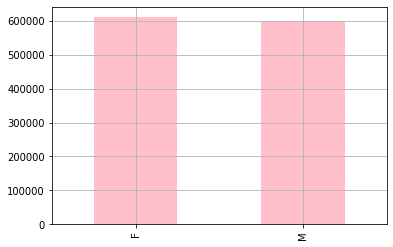

In [88]:
from pandas._libs.hashtable import value_count
DAC_investigators.gndr.value_counts().plot(kind = 'bar',color = 'pink')
plt.grid(True,'both')

<function matplotlib.pyplot.title>

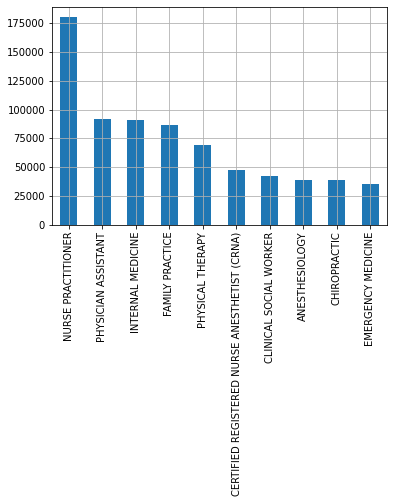

In [83]:
DAC_investigators.pri_spec.value_counts().plot.bar()
#would like to increase scale so graph is clearer
DAC_investigators.pri_spec.value_counts()[:10].plot.bar()
plt.show
plt.grid(True, 'both')
plt.title
